In [1]:
train_image_path = '/Users/peli/Google Drive/CS231n/Thumbnails'
labels = ['Logo','TextLoaded','ImageLoaded','SpinLoading','WhiteScreen']

In [2]:
from PIL import Image
from os import listdir
from os.path import isfile, join
import numpy as np
filename = '12_05_2017_13_52_50_0101.thumbnail.jpg'
im = Image.open(join(train_image_path, 'Logo', filename))
img_data = np.asarray(im)
Width, Height = img_data.shape
print(img_data.shape)
img_data_reshaped = img_data.flatten()
print(img_data_reshaped.shape)
label = np.zeros(len(labels))
label[labels.index('Logo')] = 1
print(label)

(36, 64)
(2304,)
[ 1.  0.  0.  0.  0.]


In [21]:
import os

images_data = [] 
labels_data = []
test_imgs = []
test_labels = []
for i, l in enumerate(labels):
    img_folder = join(train_image_path, l)
    img_files  = [f for f in listdir(img_folder) if isfile(join(img_folder, f)) and os.path.splitext(f)[1]=='.jpg']
    count = len(img_files)
    for k, img_file in enumerate(img_files):
        im = Image.open(join(img_folder, img_file))
        img_data = np.asarray(im)
        label = np.zeros(len(labels))
        label[i] = 1
        if count-k < 10:
            test_imgs.append(img_data.flatten())
            test_labels.append(label)
        else:
            labels_data.append(label)
            images_data.append(img_data.flatten())
    assert(len(images_data)==len(labels_data))
print(len(images_data))
print(len(labels_data))
print(labels_data[-1])
print(images_data[-1])

4608
4608
[ 0.  0.  0.  0.  1.]
[255 255 255 ..., 255 255 255]


(45, 2304)
(4608, 2304)


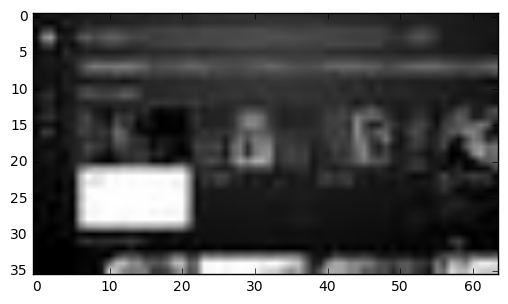

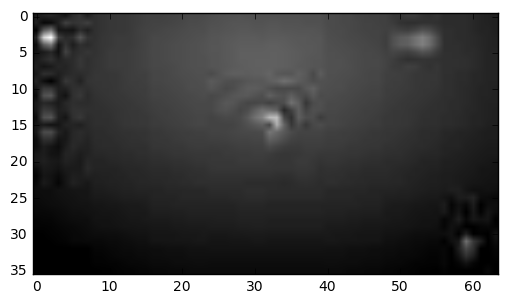

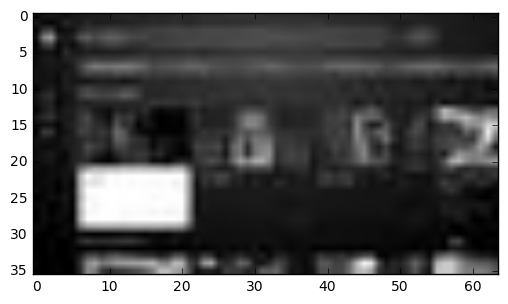

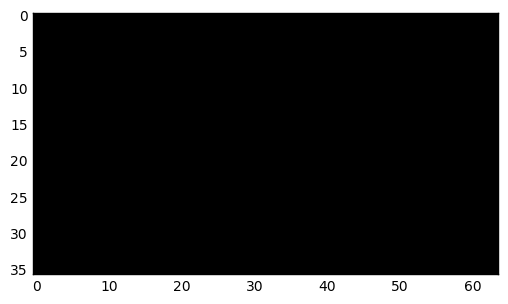

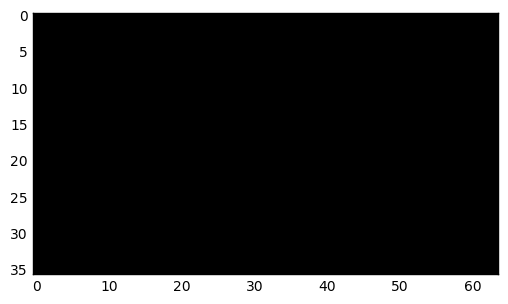

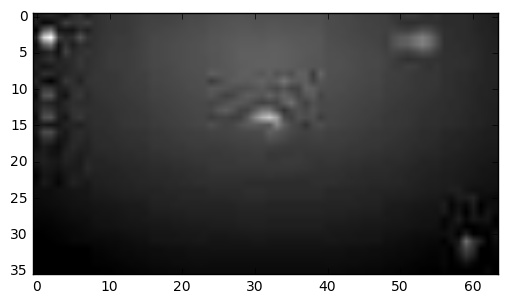

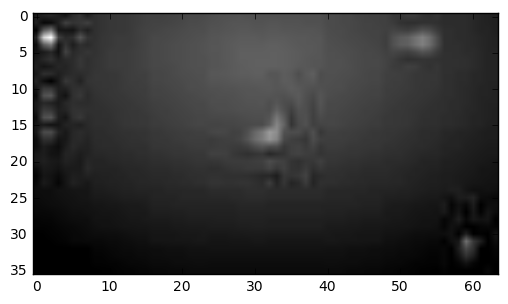

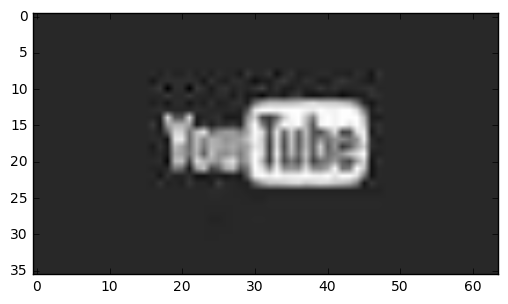

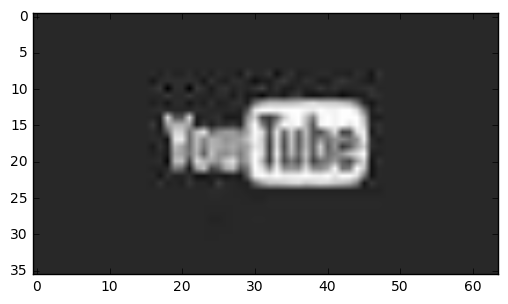

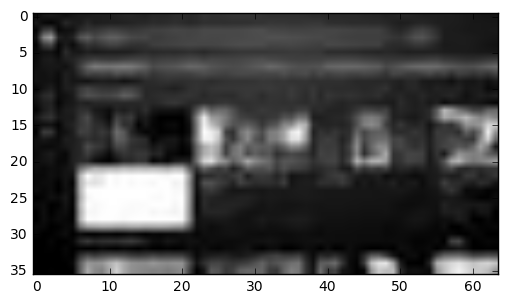

In [24]:
import matplotlib.pyplot as plt
images_np = np.asarray(images_data)
labels_np = np.asarray(labels_data)
test_images_np = np.asarray(test_imgs)
test_labels_np = np.asarray(test_labels)
print(test_images_np.shape)
print(images_np.shape)
def show_image(image):
    plt.imshow(image.reshape(Width, Height), cmap = plt.get_cmap('gray'))
    plt.show()
    
N = len(images_data)
random_image_indices = np.random.randint(0,N,10)

for i in random_image_indices:
    show_image(images_np[i])

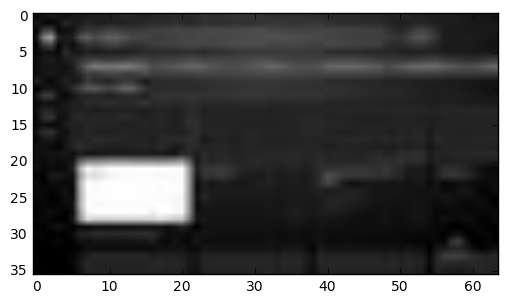

(100, 2304) (100, 5)


In [25]:
def next_batch(num=100):
    indices = np.random.randint(0,N,100)
    return images_np[indices], labels_np[indices]

imgs, lbs = next_batch() 
show_image(imgs[0])
print(imgs.shape, lbs.shape)

In [26]:
print(Width, Height)

36 64


In [27]:

import tensorflow as tf
tf.reset_default_graph()
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 36*64]) #mnist.train.images[i]
y_ = tf.placeholder(tf.float32, shape=[None, 5])   #mnist.train.labels[i]
W = tf.Variable(tf.zeros([36*64, 5])) # W init, to-do:better with random
b = tf.Variable(tf.zeros([5]))     # b init.   

In [28]:
y = tf.matmul(x, W) + b
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)) # loss function
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [29]:
sess.run(tf.global_variables_initializer())
for _ in range(1000):
    batch = next_batch(100) #batch size 100
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [30]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x:test_images_np, y_:test_labels_np}))

1.0
